<a href="https://colab.research.google.com/github/carlos-alves-one/-Eye-Disease-Analysis/blob/main/dataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Goldsmiths University of London
### MSc. Data Science and Artificial Inteligence
### Module: Data Programming
### Project Eye Disease Analysis
### Author: Carlos Manuel De Oliveira Alves
### Student: cdeol003
### Created: 29/10/2023

**1. General Information**:
   - Understand the shape of the dataset.
   - Identify any missing values.
   - Recognize data types.

In [10]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Glaucoma_Global_Analysis.csv')

# Display the first few rows of the dataset
data.head().T


,0,1,2,3,4
Country,Afghanistan,Albania,Algeria,Andorra,Angola
Population,28638530,37734135,22050908,20250586,24667186
Eye_Disease,Glaucoma,Glaucoma,Glaucoma,Glaucoma,Glaucoma
Affected_People_Male,15577,30759,47194,46621,54498
Affected_People_Female,77855,14117,51195,21502,34219
Blindness_Cases_Male,2662,5688,4306,1445,1709
Blindness_Cases_Female,3863,6738,5133,5805,6146
Healthcare_Cost,519206,584037,661147,555390,370512
Productivity_Loss,466059,662877,576810,110035,659504
Region,Asia,Europe,Africa,Europe,Africa


In [11]:
# 1. Understand the shape of the dataset
shape = data.shape

# 2. Identify any missing values
missing_values = data.isnull().sum()

# 3. Recognize data types
data_types = data.dtypes

shape, missing_values, data_types


((196, 22),
 Country                          0
 Population                       0
 Eye_Disease                      0
 Affected_People_Male             0
 Affected_People_Female           0
 Blindness_Cases_Male             0
 Blindness_Cases_Female           0
 Healthcare_Cost                  0
 Productivity_Loss                0
 Region                           0
 Age_Group                        0
 Treatment_Availability_Male      0
 Treatment_Availability_Female    0
 Medical_Facilities               0
 Research_Funding                 0
 Awareness_Programs               0
 Prevention_Measures              0
 Recovery_Rate                    0
 Mortality_Rate                   0
 Vaccination                      0
 Medication                       0
 Surgery_Options                  0
 dtype: int64,
 Country                           object
 Population                         int64
 Eye_Disease                       object
 Affected_People_Male               int64
 Affected_Peo

**2. Univariate Analysis**:
   - Study the distribution of individual variables.
   - Use measures of central tendency (mean, median) and measures of dispersion (standard deviation, variance).
   - Visualization tools: histograms, boxplots, and count plots.

2.1 Numerical Variables: For each numerical variable, I will provide summary statistics (mean, median, standard deviation, and variance) and visualize their distribution using histograms.

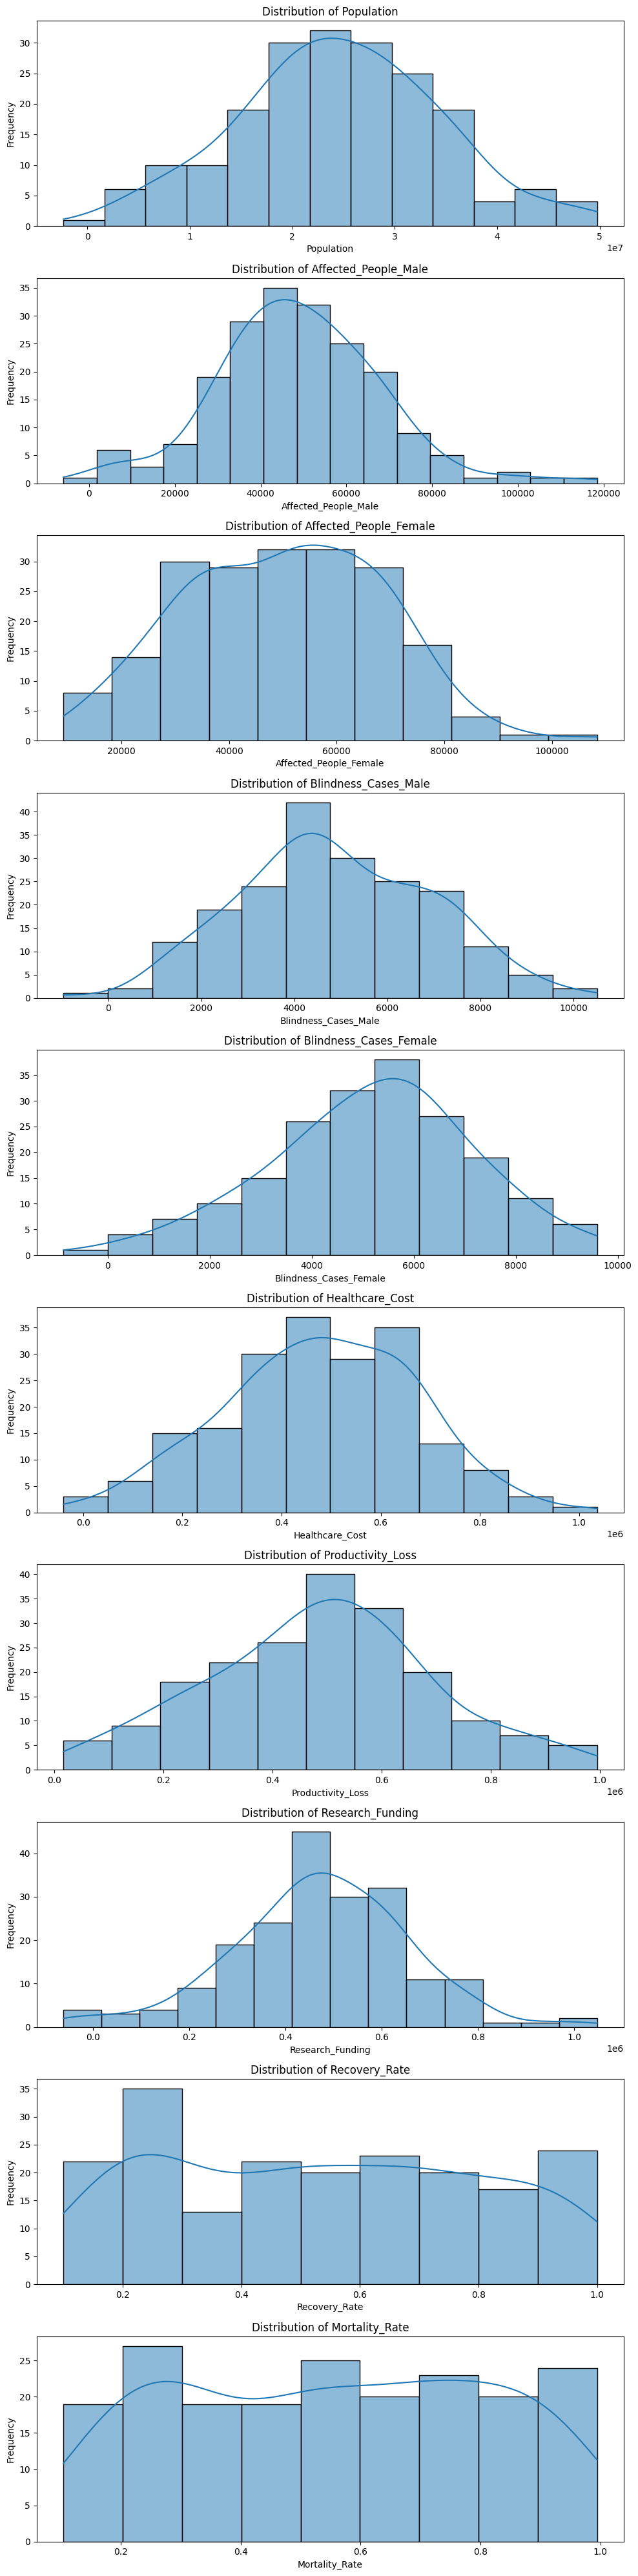

,Mean,Median,Standard Deviation,Variance
Population,2.448581e+07,2.438402e+07,9.899326e+06,9.799665e+13
Affected_People_Male,4.873019e+04,4.751450e+04,1.916291e+04,3.672172e+08
Affected_People_Female,5.008763e+04,5.121300e+04,1.836275e+04,3.371904e+08
Blindness_Cases_Male,4.897852e+03,4.605000e+03,2.049023e+03,4.198496e+06
Blindness_Cases_Female,5.175551e+03,5.397500e+03,2.008335e+03,4.033410e+06
Healthcare_Cost,4.794009e+05,4.872750e+05,1.930935e+05,3.728511e+10
Productivity_Loss,4.880510e+05,4.937955e+05,2.043374e+05,4.175376e+10
Research_Funding,4.720427e+05,4.755905e+05,1.833527e+05,3.361823e+10
Recovery_Rate,5.350577e-01,5.207147e-01,2.682103e-01,7.193678e-02
Mortality_Rate,5.530053e-01,5.507066e-01,2.604885e-01,6.785428e-02


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Set up the plotting area
fig, axes = plt.subplots(nrows=len(numerical_cols), figsize=(10, 4 * len(numerical_cols)))

# Plot histograms for each numerical variable
for ax, col in zip(axes, numerical_cols):
    sns.histplot(data[col], ax=ax, kde=True)
    ax.set_title(f'Distribution of {col}')
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

# Display summary statistics for numerical columns
summary_statistics = data[numerical_cols].describe().transpose()[['mean', '50%', 'std']]
summary_statistics.columns = ['Mean', 'Median', 'Standard Deviation']
summary_statistics['Variance'] = summary_statistics['Standard Deviation']**2
summary_statistics


2.2 Categorical Variables: For each categorical variable, I will provide value counts and visualize their distribution using count plots or bar charts.

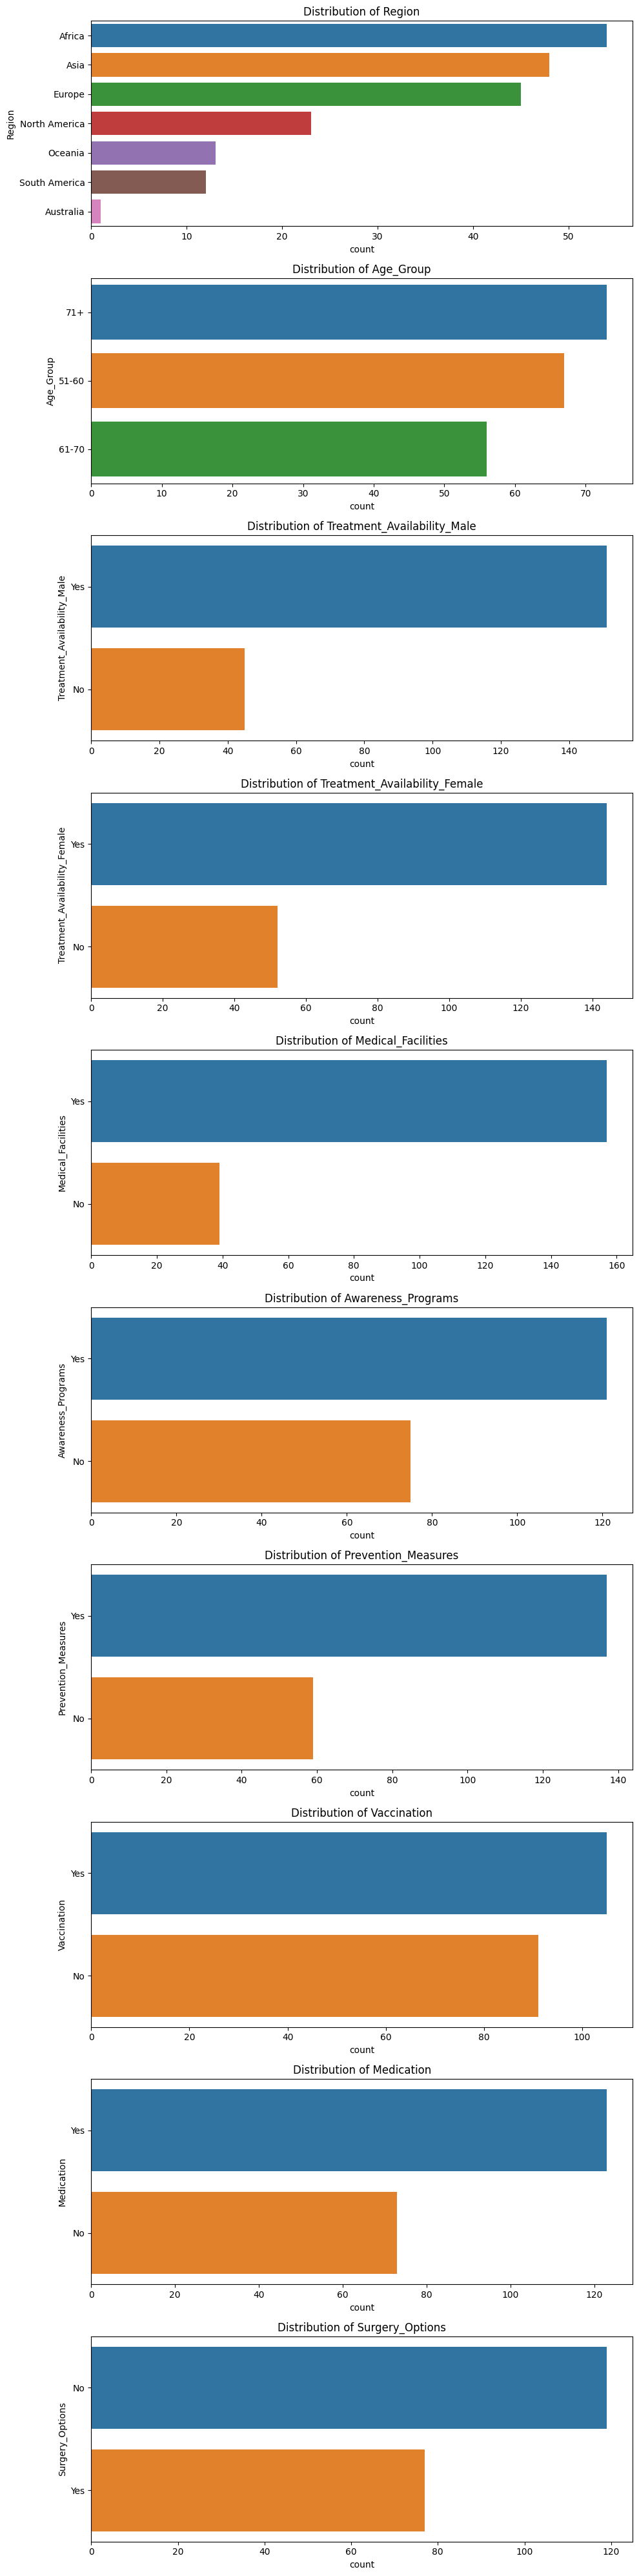

In [13]:
# Filter out categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Exclude 'Country' and 'Eye_Disease' since they are identifiers and not categorical variables for analysis
categorical_cols = [col for col in categorical_cols if col not in ['Country', 'Eye_Disease']]

# Set up the plotting area
fig, axes = plt.subplots(nrows=len(categorical_cols), figsize=(10, 4 * len(categorical_cols)))

# Plot count plots for each categorical variable
for ax, col in zip(axes, categorical_cols):
    sns.countplot(y=data[col], ax=ax, order=data[col].value_counts().index)
    ax.set_title(f'Distribution of {col}')
    ax.set_ylabel(col)

# Adjust layout
plt.tight_layout()
plt.show()


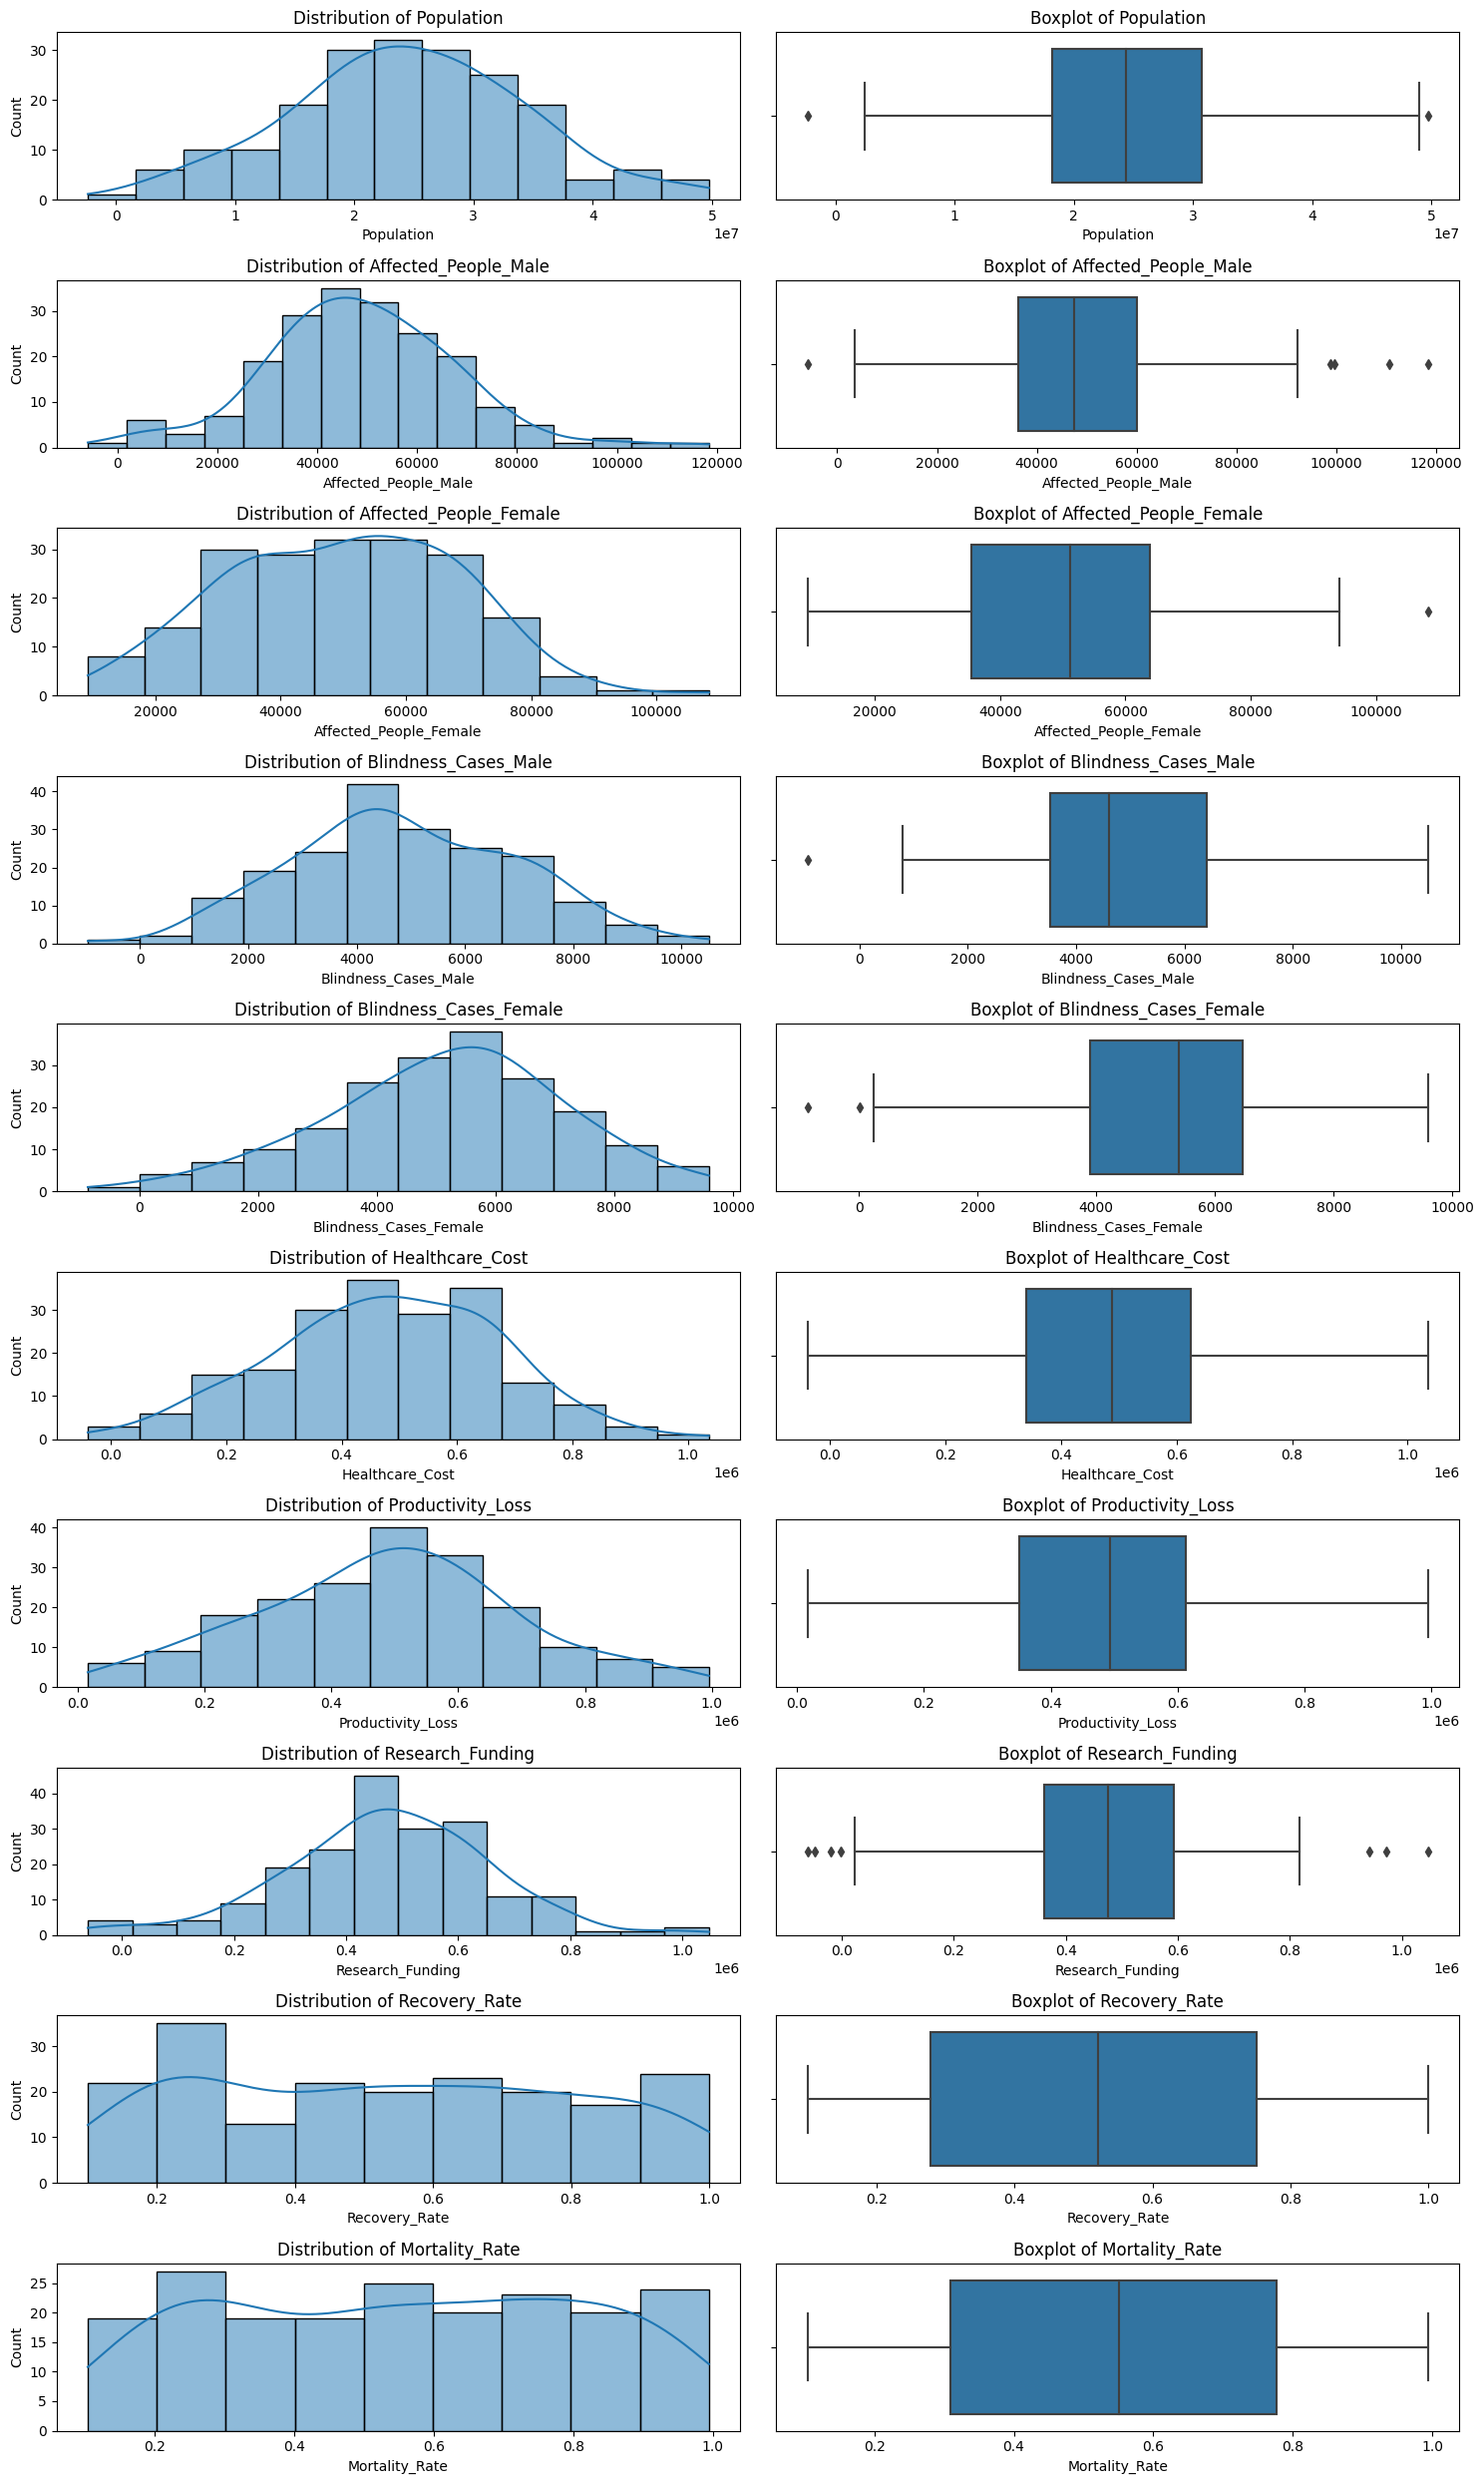

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns for analysis
numerical_cols = ['Population', 'Affected_People_Male', 'Affected_People_Female',
                  'Blindness_Cases_Male', 'Blindness_Cases_Female',
                  'Healthcare_Cost', 'Productivity_Loss', 'Research_Funding',
                  'Recovery_Rate', 'Mortality_Rate']

# Set up the figure and axes for plotting
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=2, figsize=(15, 25))

# Plot histograms and boxplots for each numerical column
for i, col in enumerate(numerical_cols):
    sns.histplot(data[col], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Distribution of {col}')
    sns.boxplot(x=data[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


ValueError: ignored

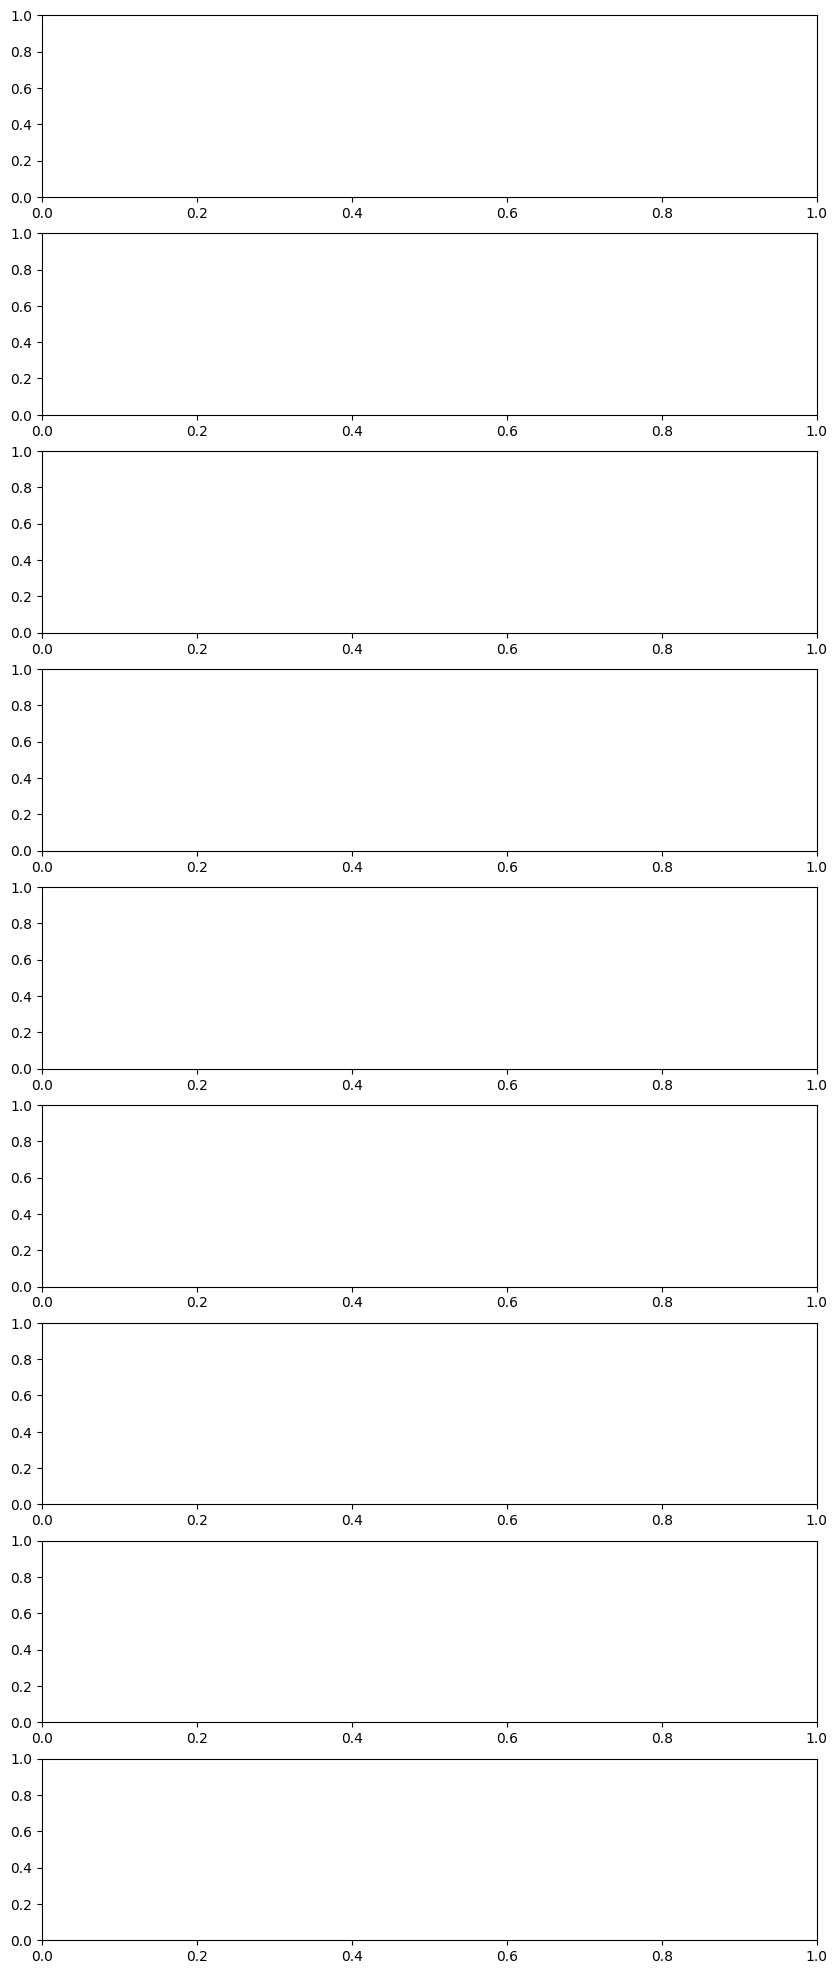

In [16]:
# List of categorical columns for analysis
categorical_cols = ['Region', 'Treatment_Availability_Male', 'Treatment_Availability_Female',
                    'Medical_Facilities', 'Awareness_Programs', 'Prevention_Measures',
                    'Vaccination', 'Medication', 'Surgery_Options']

# Set up the figure for plotting
fig, axes = plt.subplots(nrows=len(categorical_cols), figsize=(10, 25))

# Plot count plots for each categorical column
for i, col in enumerate(categorical_cols):
    sns.countplot(data[col], ax=axes[i], order=data[col].value_counts().index)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()
